In [1]:
from matplotlib import pyplot as plt
from itertools import product
# import seaborn as sns
import pandas as pd
import os.path as op
import argparse
import re
import numpy as np
import matplotlib.pyplot as plt
import mne
from scipy import signal
from scipy.fft import fftshift
from bids import BIDSLayout
from statsmodels.stats.anova import AnovaRM

from util.io.ffr import *

In [2]:
def read_epochs(sub, desc):
    '''
    reads and concatenates epochs across runs
    '''
    from bids import BIDSLayout
    layout = BIDSLayout(BIDS_ROOT, derivatives = True)
    run = lambda f: int(re.findall('run-(\w+)_', f)[0])
    fnames = layout.get(
        return_type = 'filename',
        subject = sub, 
        desc = desc
        )
    print(fnames)
    fnames.sort(key = run)
    epochs_all = [mne.read_epochs(f) for f in fnames]
    epochs = mne.concatenate_epochs(epochs_all)
    epochs = epochs.pick('eeg')
    return epochs

In [11]:
97/0.6

161.66666666666669

In [3]:
BIDS_ROOT = '../data/bids'
layout = BIDSLayout(BIDS_ROOT, derivatives = True, regex_search = 'forERP')
subs = layout.get_subjects(scope = 'erp')
subs.sort(key = int)
evokeds = pd.DataFrame()

for sub in subs:
    
    # Read epochs
    epochs = read_epochs(sub, 'forERP')
    
    # Compute evokeds 
    conditions = list(epochs.event_id.keys())
    chans = ['Cz', 'Fz', 'FCz', 'CPz', 'Pz']
    for c in conditions:
        for chan in chans:
            uV = np.squeeze(epochs[c].average(picks = chan).get_data())
            t = np.arange(-300, 300 + (1000/5000), 1000/5000)
            d = {
                'sub': sub,
                'chan': chan,
                'msec': t,
                'uV': uV
            }

            # Bind into dataframe
            evoked = pd.DataFrame(d)
            evokeds = pd.concat([evokeds, evoked])
            evokeds = evokeds.reset_index(drop = True)

evokeds.to_csv('evokeds.csv', index = False)

/project/hcn1/.conda/envs/mne/lib/python3.11/site-packages/bids/layout/validation.py:124: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "
/project/hcn1/.conda/envs/mne/lib/python3.11/site-packages/bids/layout/validation.py:124: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/erp/sub-3/sub-3_task-pitch_run-1_desc-forERP_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/erp/sub-3/sub-3_task-pitch_run-1_desc-forERP_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4172 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4172 matching events found
Applying baseline correction (mode: mean)


ValueError: All arrays must be of the same length

In [16]:
epochs

Number of events,4172
Events,11: 45712: 50113: 47721: 51422: 50523: 48931: 42332: 40933: 397
Time range,-0.300 – 0.300 s
Baseline,-0.300 – 0.000 s


In [15]:
np.shape(epochs.get_data())

/scratch/local/jobs/18033977/ipykernel_3210970/3250172744.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  np.shape(epochs.get_data())


(4172, 62, 97)

In [150]:
# evokeds_Cz = evokeds[evokeds.chan == 'Cz']
sns.lineplot(evokeds_Cz, x = 'msec', y = 'uV')

,chan,msec,uV
0,Cz,-250.0,1.634980e-09
1,Cz,-249.8,5.974834e-09
2,Cz,-249.6,9.365589e-09
3,Cz,-249.4,1.170717e-08
4,Cz,-249.2,1.284131e-08
...,...,...,...
4940791,Cz,299.2,-1.133472e-07
4940792,Cz,299.4,-9.912327e-08
4940793,Cz,299.6,-8.308423e-08
4940794,Cz,299.8,-6.650459e-08


In [147]:
# BIDS_ROOT = '../data/bids'
# layout = BIDSLayout(BIDS_ROOT, derivatives = True)
# subs = layout.get_subjects(scope = 'preprocessing')
# subs.sort(key = int)
# evokeds = {'11': list(),
#            '12': list(),
#            '13': list(),
#            '21': list(),
#            '22': list(),
#            '23': list(),
#            '31': list(),
#            '32': list(),
#            '33': list()}

evokeds = pd.DataFrame()
for sub in subs:
    
    # Read epochs
    # epochs = read_epochs(sub, 'clean')
    
    # Compute evokeds for each condition
    conditions = list(epochs.event_id.keys())
    print(conditions)
    chans = ['Cz', 'Fz', 'FCz', 'CPz', 'Pz']
    for c in conditions:
        for chan in chans:
            evoked = np.squeeze(epochs[c].average(picks = chan).get_data())
            t = np.arange(-250, 300 + (1000/5000), 1000/5000)
            d = {
                'chan': chan,
                'msec': t,
                'uV': evoked
            }
            evoked = pd.DataFrame(d)
            print(evoked_df)
            evokeds = pd.concat(evokeds, evoked
            

    break
break
    # sub_evokeds = {c:epochs[c].average(picks = chans).get_data() for c in conditions}
    
    # # Concatenate into dictionary of lists of evokeds
    # t = np.arange(-250, 300 + (1000/5000), 1000/5000)
    # for chan in chans:
    #     chan_evoked = sub_evokeds.pick_channels(chan)
    #     print(np.shape(chan_evoked))
    #     d = {'chan': 'a',
    #          # 'msec': t,
    #          'uV': chan_evoked}
    # # sub_df = pd.DataFrame(d)
    # # for c in conditions:
    #     evokeds[c].append(sub_evokeds[c])   
    

['11', '12', '13', '21', '22', '23', '31', '32', '33']
     chan   msec            uV
0      Cz -250.0  1.634980e-09
1      Cz -249.8  5.974834e-09
2      Cz -249.6  9.365589e-09
3      Cz -249.4  1.170717e-08
4      Cz -249.2  1.284131e-08
...   ...    ...           ...
2746   Cz  299.2 -7.589235e-08
2747   Cz  299.4 -7.505322e-08
2748   Cz  299.6 -7.191785e-08
2749   Cz  299.8 -6.753849e-08
2750   Cz  300.0 -6.318949e-08

[2751 rows x 3 columns]
     chan   msec            uV
0      Cz -250.0  1.634980e-09
1      Cz -249.8  5.974834e-09
2      Cz -249.6  9.365589e-09
3      Cz -249.4  1.170717e-08
4      Cz -249.2  1.284131e-08
...   ...    ...           ...
5497   Fz  299.2 -8.084062e-08
5498   Fz  299.4 -1.089046e-07
5499   Fz  299.6 -1.342245e-07
5500   Fz  299.8 -1.570311e-07
5501   Fz  300.0 -1.778780e-07

[5502 rows x 3 columns]
     chan   msec            uV
0      Cz -250.0  1.634980e-09
1      Cz -249.8  5.974834e-09
2      Cz -249.6  9.365589e-09
3      Cz -249.4  1.170717e

KeyboardInterrupt: 

In [138]:
np.shape(d['uV'])

(1, 2751)

In [52]:
np.shape(sub_evokeds['11'].get_data())
np.shape(epochs['11'].average(picks = ['Cz', 'Fz', 'FCz', 'CPz', 'Pz']).get_data())

(5, 2751)

In [126]:
sub_evokeds.pick_channels(['Cz'])

AttributeError: 'dict' object has no attribute 'pick_channels'

In [88]:
evokeds_tmp = []
for evoked in evokeds['11']:
    if evoked.nave > 300 and len(evoked.ch_names) == 5:
        evokeds_tmp.append(evoked.get_data())
        print(np.shape(evoked.get_data()))
# np.shape(evokeds_tmp)

(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)
(5, 2751)


In [72]:
# graph = sns.lineplot(data = evokeds_tmp, x = "freq", y = "dB", hue = "stim", palette = 'tab10', ax = ax)

605

In [124]:
t = np.arange(-250, 300 + (1000/5000), 1000/5000)
d = {'chan': 'a',
     'msec': t,
     'uV': evokeds_tmp[1,1,:]}
pd.DataFrame(d)

,chan,msec,uV
0,a,-250.0,5.309744e-08
1,a,-249.8,5.542247e-08
2,a,-249.6,6.144482e-08
3,a,-249.4,7.067082e-08
4,a,-249.2,8.204603e-08
...,...,...,...
2746,a,299.2,-9.293357e-08
2747,a,299.4,-7.835354e-08
2748,a,299.6,-5.848982e-08
2749,a,299.8,-3.532298e-08


In [96]:
0.0002*2751 # msec per step

0.5502

In [122]:
print(np.shape(evokeds_tmp))
evokeds_tmp = np.array(evokeds_tmp)
np.shapeevokeds_tmp[:,1,:]

(31, 5, 2751)


array([[-6.81802411e-09, -5.57057282e-09, -9.82747846e-10, ...,
        -1.34224504e-07, -1.57031149e-07, -1.77878038e-07],
       [ 5.30974436e-08,  5.54224692e-08,  6.14448224e-08, ...,
        -5.84898159e-08, -3.53229799e-08, -1.12297528e-08],
       [ 7.26648591e-08,  8.80032184e-08,  1.03072587e-07, ...,
        -8.02156429e-08, -1.24337720e-07, -1.60246726e-07],
       ...,
       [-4.31813969e-08, -1.21789350e-08,  1.54020724e-08, ...,
        -8.06038487e-08, -6.49767575e-08, -5.27885116e-08],
       [-3.85256449e-08, -4.68155293e-08, -5.49563198e-08, ...,
         4.00586102e-09,  1.48015121e-08,  2.30255234e-08],
       [-1.12017723e-07, -9.78876104e-08, -7.88791705e-08, ...,
        -6.05447277e-08, -9.16587993e-09,  3.71647899e-08]])

In [101]:
0.0002*2751

0.5502

combining channels using "mean"
combining channels using "mean"


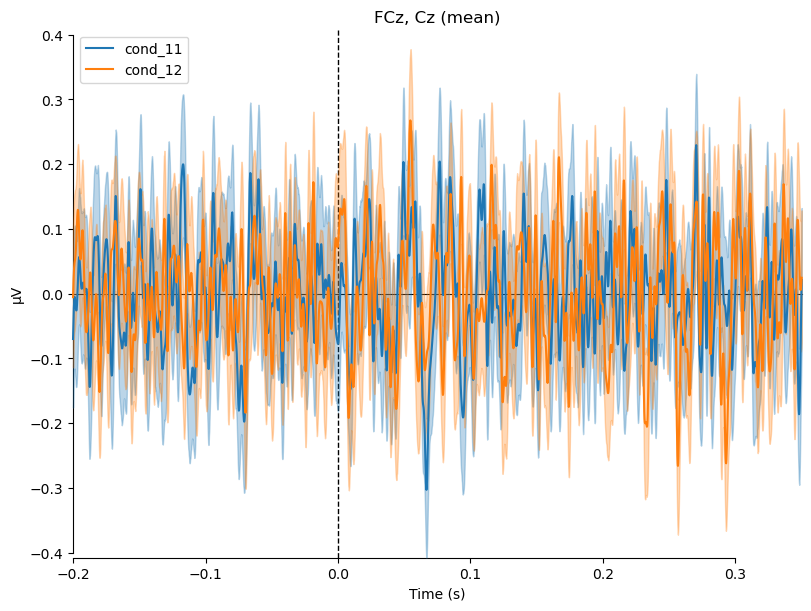

[<Figure size 800x600 with 1 Axes>]

In [37]:
evokeds_d = dict(
    cond_11=list(epochs["11"].iter_evoked()),
    cond_12=list(epochs["21"].iter_evoked()),
)
mne.viz.plot_compare_evokeds(evokeds_d, combine="mean", picks=picks)

In [23]:
evokeds

{'11': [<Evoked | '11' (average, N=789), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
  <Evoked | '11' (average, N=176), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
  <Evoked | '11' (average, N=218), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
  <Evoked | '11' (average, N=668), -0.2 – 0.35 s, baseline -0.2 – 0 s, 61 ch, ~1.4 MB>,
  <Evoked | '11' (average, N=634), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
  <Evoked | '11' (average, N=633), -0.2 – 0.35 s, baseline -0.2 – 0 s, 61 ch, ~1.4 MB>,
  <Evoked | '11' (average, N=522), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
  <Evoked | '11' (average, N=267), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
  <Evoked | '11' (average, N=357), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
  <Evoked | '11' (average, N=364), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
  <Evoked | '11' (average, N=443), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
  <Evoked | '11' (average,

In [38]:
sub_evokeds

{'11': <Evoked | '11' (average, N=176), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
 '12': <Evoked | '12' (average, N=173), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
 '13': <Evoked | '13' (average, N=167), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
 '21': <Evoked | '21' (average, N=82), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
 '22': <Evoked | '22' (average, N=88), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
 '23': <Evoked | '23' (average, N=100), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
 '31': <Evoked | '31' (average, N=190), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
 '32': <Evoked | '32' (average, N=183), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
 '33': <Evoked | '33' (average, N=173), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>}

In [37]:
evokeds = {'11': list(),
           '12': list(),
           '13': list(),
           '21': list(),
           '22': list(),
           '23': list(),
           '31': list(),
           '32': list(),
           '33': list()}
evokeds

{'11': [],
 '12': [],
 '13': [],
 '21': [],
 '22': [],
 '23': [],
 '31': [],
 '32': [],
 '33': []}

In [40]:
# {c:evokeds[str(c)].append([sub_evokeds[c]]) for c in conditions}
# {print([sub_evokeds[c]]) for c in conditions}
{print(evokeds[str(c)]) for c in conditions}

[[<Evoked | '11' (average, N=176), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>]]
[[<Evoked | '12' (average, N=173), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>]]
[[<Evoked | '13' (average, N=167), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>]]
[[<Evoked | '21' (average, N=82), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>]]
[[<Evoked | '22' (average, N=88), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>]]
[[<Evoked | '23' (average, N=100), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>]]
[[<Evoked | '31' (average, N=190), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>]]
[[<Evoked | '32' (average, N=183), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>]]
[[<Evoked | '33' (average, N=173), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>]]


{None}

In [59]:
evokeds = {'11': list(),
           '12': list(),
           '13': list(),
           '21': list(),
           '22': list(),
           '23': list(),
           '31': list(),
           '32': list(),
           '33': list()}
for i in range(3):
    for c in conditions:
        evokeds[c].append(sub_evokeds[c])
evokeds['11']

[<Evoked | '11' (average, N=176), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
 <Evoked | '11' (average, N=176), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>,
 <Evoked | '11' (average, N=176), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>]

[[<Evoked | '11' (average, N=176), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>],
 [<Evoked | '11' (average, N=176), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>],
 [<Evoked | '11' (average, N=176), -0.2 – 0.35 s, baseline -0.2 – 0 s, 62 ch, ~1.4 MB>]]